# California Housing Dataset Linear Regression

In this project, we aim to predict California housing prices using a linear regression model built with PyTorch. The California Housing Dataset is a well-known dataset in machine learning, containing various features such as median income, average number of rooms, population, and more, which help explain the variation in housing prices across different regions in California.

Project Objectives:

- Explore the Data: Understand the distribution, trends, and relationships between the features and the target variable (median house value).
Data Preprocessing: Clean and standardize the data to ensure that our model training is robust and efficient. This includes handling missing values, splitting the data into training and testing sets, and applying feature scaling.
- Model Development: Implement a simple linear regression model using PyTorch. Linear regression is an excellent baseline for regression problems, allowing us to understand the fundamental relationships within the data.
Evaluation and Visualization: Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). Additionally, visualize the predictions against the actual values to assess how well the model fits the data.
- Through this step-by-step analysis, we will demonstrate how to build, train, and evaluate a linear regression model on the California Housing Dataset, providing insights into both the strengths and limitations of this approach.

-
![California Housing Prices](../assets/images/california_housing.jpg
)


In [2]:
import sys
import os

# Get the project root directory (one level up from 'notebooks/')
root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(root_path)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [4]:
from src.dataset import CaliforniaHousingDataset

csv_file = '../data/california_housing.csv'

df = pd.read_csv(csv_file)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Check data types and missing values
df.info()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


When comparing the maximum values with the 75th percentiles for these features, we notice a significant gap, which supports our suspicion that there are a few extreme outliers.

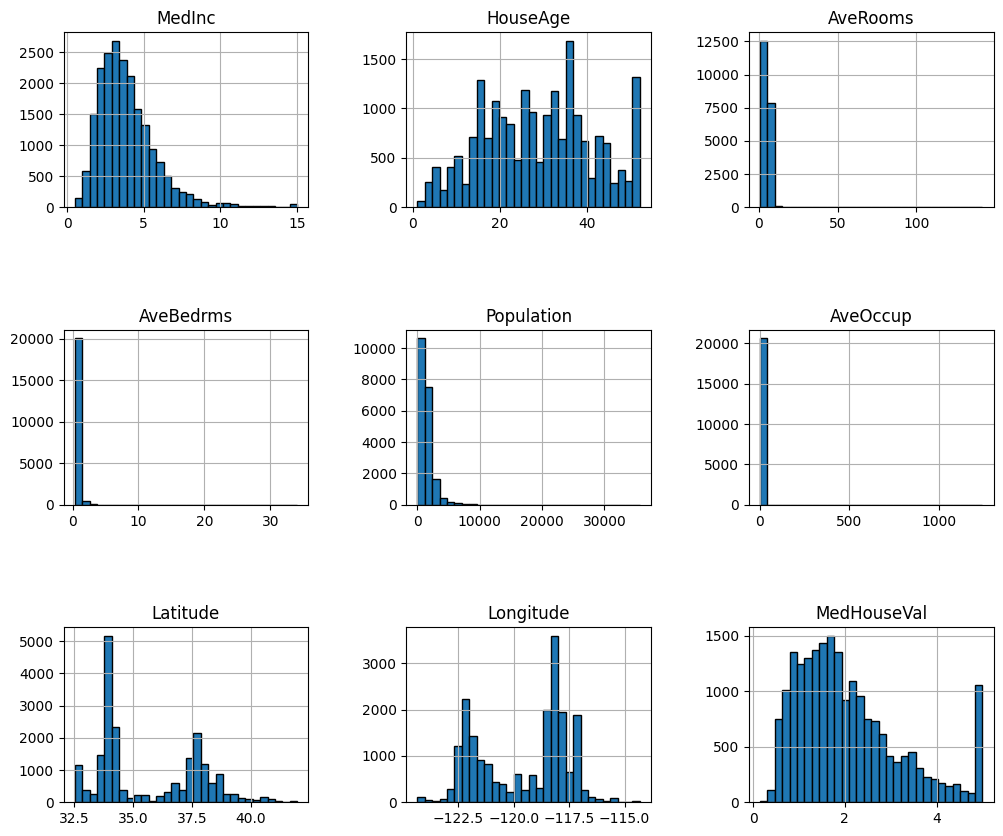

In [6]:
# Distributon of columns

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

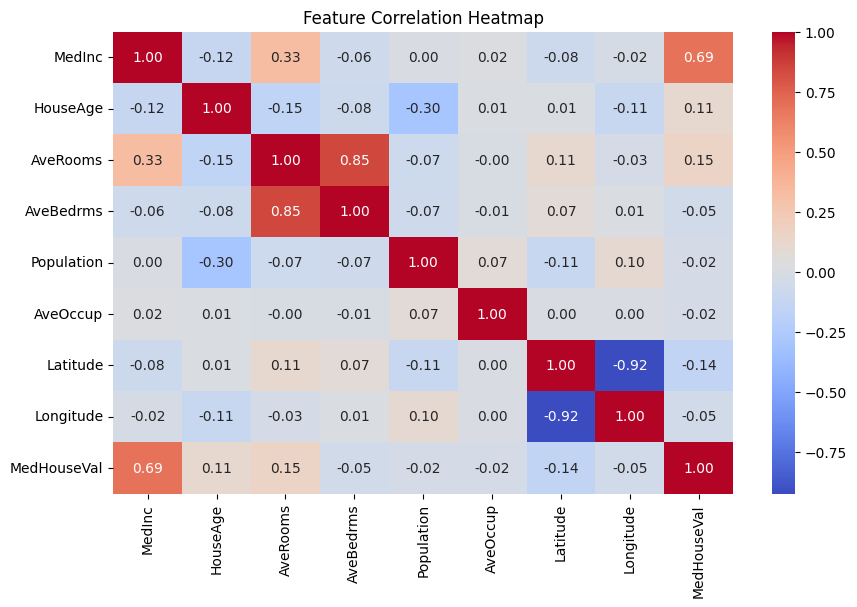

In [7]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

- Strong Positive Correlations: MedInc (0.69) with MedHouseVal → Higher income leads to higher house prices.
- Multicollinearity: AveRooms (0.85) with AveBedrms → Consider dropping one.
- Weak/No Impact on House Prices: Population & AveOccup → May be irrelevant.
- Negative Correlations: Longitude & Latitude → Location affects prices, explore further.

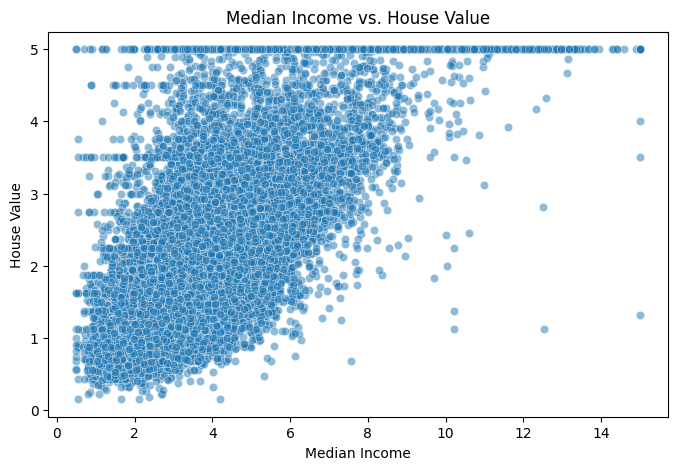

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"], alpha=0.5)
plt.title("Median Income vs. House Value")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.show()

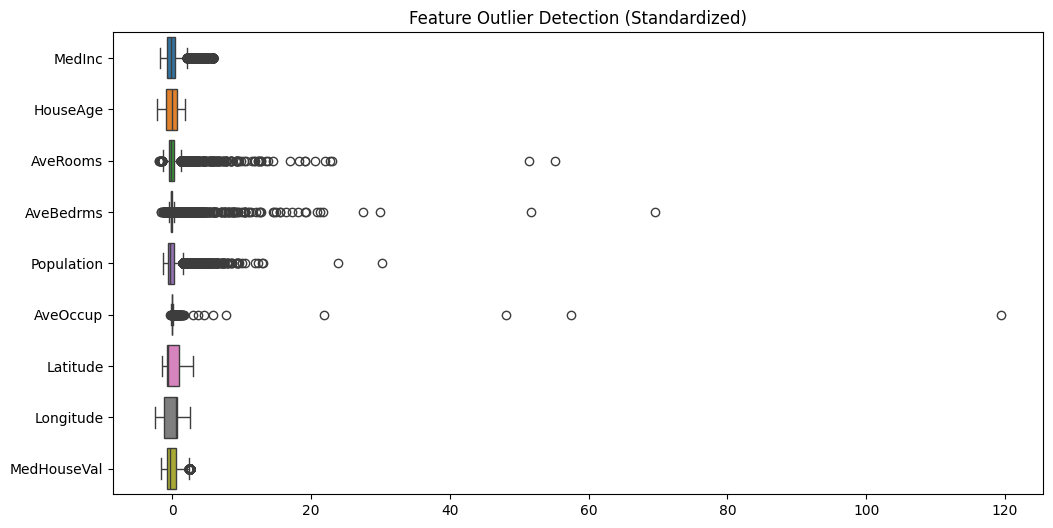

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot boxplot on standardized data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized, orient="h")
plt.title("Feature Outlier Detection (Standardized)")
plt.show()


### Dropping `Population` and `AveOccup`
We remove these features because:
- **Low correlation** with `MedHouseVal`, meaning they contribute little to the prediction.
- **High correlation with each other**, which can lead to multicollinearity, reducing model interpretability.
- **Presence of outliers**, especially in `Population`, which may affect model performance.


In [10]:
# Drop columns if they exist
columns_to_drop = ['Population', 'AveOccup']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

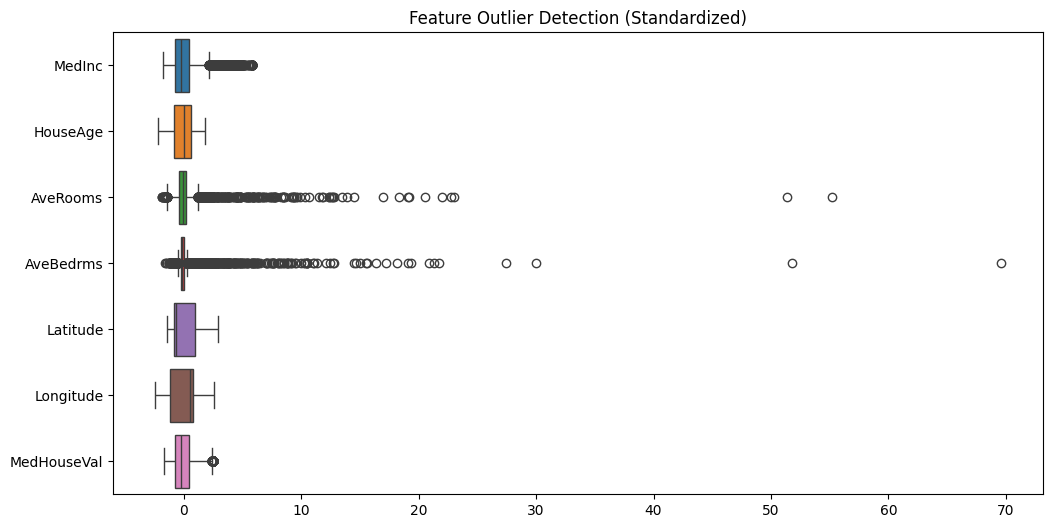

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot boxplot on standardized data without population and AveOccup
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized, orient="h")
plt.title("Feature Outlier Detection (Standardized)")
plt.show()

# Predicting House Prices with Linear Regression

After preprocessing the dataset, we are now ready to predict house prices using **Linear Regression**.  

### **Steps Taken:**
1. **Outlier Detection & Removal**  
   - Removed highly skewed features (**Population** and **AveOccup**) due to weak correlation with the target.  

2. **Feature Scaling**  
   - Applied **StandardScaler** to normalize features, ensuring better model performance.  

3. **Model Training**  
   - Split data into training and testing sets.  
   - Trained a **Linear Regression** model to predict `MedHouseVal` (median house value).  

4. **Evaluation**  
   - Measured performance using **Mean Squared Error (MSE)** and **R² score**. 
   - uses Adam Optimizer from pytorch

### **Next Steps**
- Optimize performance by **feature selection** or **regularization techniques (Ridge/Lasso)**.

🚀 **Let's train the model and make predictions!**


In [12]:
import torch
from torch.utils.data import DataLoader
from src.model import LinearRegressionModel
from src.train import train_model
from src.dataset import CaliforniaHousingDataset
from src.plot import plot_regression_results
from sklearn.model_selection import train_test_split


Epoch [10/100] | Train Loss: 0.5261 | Test Loss: 0.5506
Epoch [20/100] | Train Loss: 0.5262 | Test Loss: 0.5508
Epoch [30/100] | Train Loss: 0.5262 | Test Loss: 0.5508
Epoch [40/100] | Train Loss: 0.5262 | Test Loss: 0.5508
Epoch [50/100] | Train Loss: 0.5262 | Test Loss: 0.5508
Epoch [60/100] | Train Loss: 0.5262 | Test Loss: 0.5508
Epoch [70/100] | Train Loss: 0.5262 | Test Loss: 0.5508
Epoch [80/100] | Train Loss: 0.5262 | Test Loss: 0.5508
Epoch [90/100] | Train Loss: 0.5262 | Test Loss: 0.5508
Epoch [100/100] | Train Loss: 0.5262 | Test Loss: 0.5508


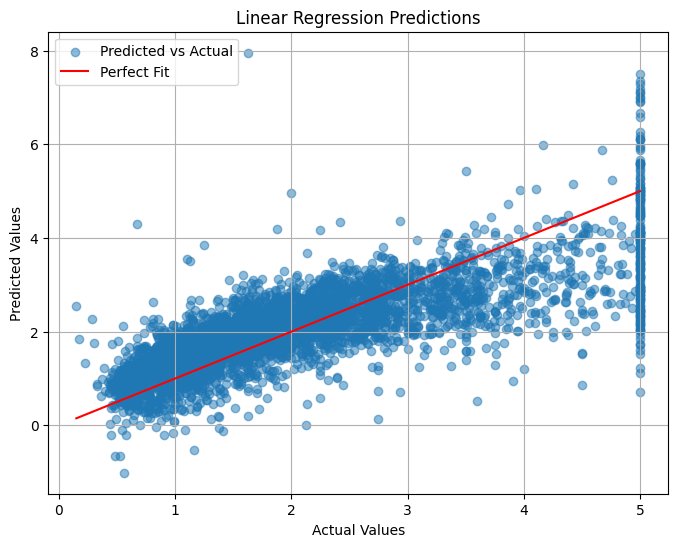

In [14]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get the Dataframe
data = df

# perform train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Compute scaling from training data only
train_features = train_data.drop(columns=['MedHouseVal']).values
mean, std= train_features.mean(axis=0), train_features.std(axis=0)

# Create Datasets
train_dataset = CaliforniaHousingDataset(df=train_data, mean=mean, std=std)
test_dataset = CaliforniaHousingDataset(df=test_data, mean=mean, std=std)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# Initilized a model
model = LinearRegressionModel(input_dim=6).to(device=device)

trained_model = train_model(model, train_loader, test_loader, device, num_epochs=100, lr=0.01)

# Plot the results
plot_regression_results(trained_model, test_loader, device)

[Ridge] Epoch 10/100 | Train Loss: 0.5267 | Test Loss: 0.5492
[Ridge] Epoch 20/100 | Train Loss: 0.5268 | Test Loss: 0.5493
[Ridge] Epoch 30/100 | Train Loss: 0.5268 | Test Loss: 0.5493
[Ridge] Epoch 40/100 | Train Loss: 0.5268 | Test Loss: 0.5493
[Ridge] Epoch 50/100 | Train Loss: 0.5268 | Test Loss: 0.5493
[Ridge] Epoch 60/100 | Train Loss: 0.5268 | Test Loss: 0.5493
[Ridge] Epoch 70/100 | Train Loss: 0.5268 | Test Loss: 0.5493
[Ridge] Epoch 80/100 | Train Loss: 0.5268 | Test Loss: 0.5493
[Ridge] Epoch 90/100 | Train Loss: 0.5268 | Test Loss: 0.5493
[Ridge] Epoch 100/100 | Train Loss: 0.5268 | Test Loss: 0.5493


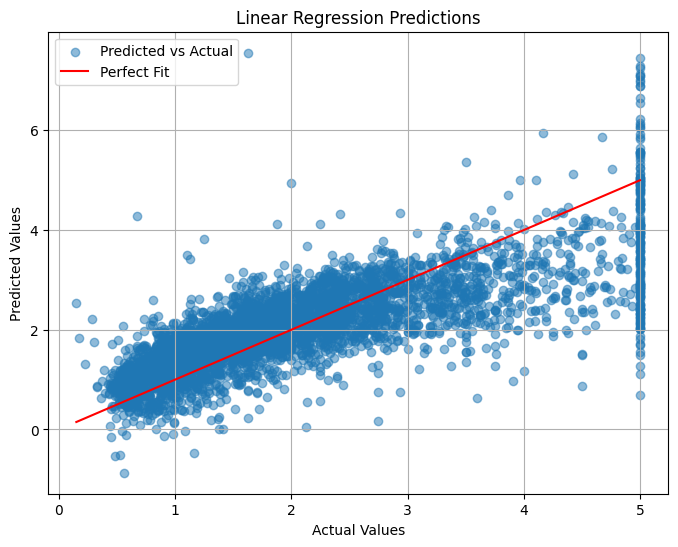

In [15]:
from src.train import train_model_ridge

model_ridge = LinearRegressionModel(input_dim=6).to(device)
trained_model_ridge = train_model_ridge(
    model_ridge, 
    train_loader, 
    test_loader, 
    device, 
    num_epochs=100, 
    lr=0.01, 
    weight_decay=0.01  # L2 penalty coefficient
)
plot_regression_results(trained_model_ridge, test_loader, device, title='Ridge Regression Predictions')


[Lasso] Epoch 10/100 | Train Loss: 0.5262 | Test Loss: 0.5507
[Lasso] Epoch 20/100 | Train Loss: 0.5263 | Test Loss: 0.5508
[Lasso] Epoch 30/100 | Train Loss: 0.5263 | Test Loss: 0.5508
[Lasso] Epoch 40/100 | Train Loss: 0.5263 | Test Loss: 0.5508
[Lasso] Epoch 50/100 | Train Loss: 0.5263 | Test Loss: 0.5508
[Lasso] Epoch 60/100 | Train Loss: 0.5263 | Test Loss: 0.5508
[Lasso] Epoch 70/100 | Train Loss: 0.5263 | Test Loss: 0.5508
[Lasso] Epoch 80/100 | Train Loss: 0.5263 | Test Loss: 0.5508
[Lasso] Epoch 90/100 | Train Loss: 0.5263 | Test Loss: 0.5508
[Lasso] Epoch 100/100 | Train Loss: 0.5263 | Test Loss: 0.5508


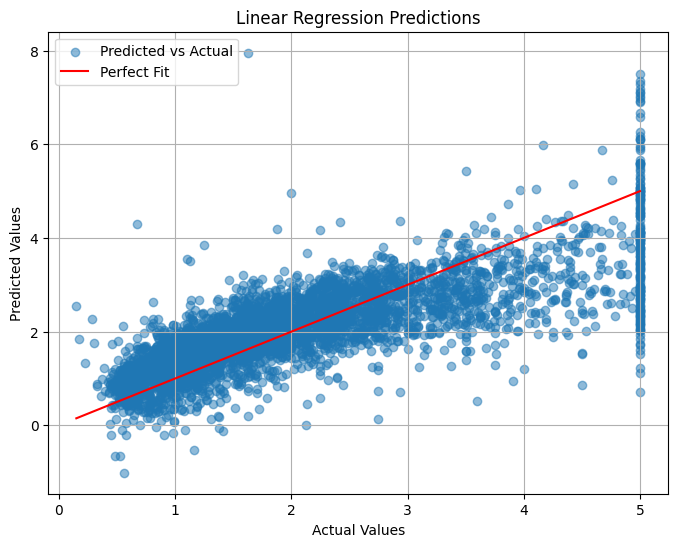

In [16]:
from src.train import train_model_lasso

model_lasso = LinearRegressionModel(input_dim=6).to(device)
trained_model_lasso = train_model_lasso(
    model_lasso,
    train_loader,
    test_loader,
    device,
    num_epochs=100,
    lr=0.01,
    lambda_l1=1e-5  # L1 penalty coefficient
)

plot_regression_results(trained_model_lasso, test_loader, device, title='Lasso Regression Predictions')

We trained three variations of linear regression—Plain, Ridge, and Lasso—on the California Housing dataset:

1. Plain Linear Regression captured a basic linear trend but underpredicted higher house values.
2. Ridge Regression (L2 regularization) added a penalty to shrink large coefficients, helping reduce overfitting and keep the model more stable.
3. Lasso Regression (L1 regularization) encouraged sparsity, potentially setting some coefficients to zero and acting as a form of feature selection.

Although the test losses for all three methods were around 0.55, each approach handles overfitting and coefficient magnitudes differently. Ridge helps when many features share predictive power, while Lasso is useful for reducing complexity by driving some weights to zero. Despite these regularizations, the model still underestimates higher house values, indicating that additional feature engineering (e.g., new features or transformations) or more advanced models (e.g., tree-based methods) might be needed to better capture non-linear relationships in the data.

# Final Conclusion

Throughout this project, we explored the California Housing dataset via **Exploratory Data Analysis (EDA)**, identifying key features and distributions. We then proceeded with **Linear Regression**, **Ridge Regression**, and **Lasso Regression**:

1. **Plain Linear Regression** showed a general upward trend but **underpredicted** higher house values.  
2. **Ridge Regression (L2)** added a penalty on large coefficients, reducing overfitting and providing more stable predictions.  
3. **Lasso Regression (L1)** encouraged sparsity, potentially setting some weights to zero, acting as a form of feature selection.

Despite these methods, the model still struggled to capture higher house values accurately, indicating that additional steps—such as **feature engineering** (e.g., polynomial terms, domain-specific ratios), **target transformation** (e.g., log-transforming `MedHouseVal`), or **advanced modeling techniques** (e.g., Random Forest, XGBoost)—may further improve performance.

Overall, our analysis demonstrates:
- **The importance of careful data preprocessing** (removing or transforming outliers, scaling features).  
- **The value of regularization** (Ridge/Lasso) to mitigate overfitting in linear models.  
- **Opportunities for deeper exploration**, such as more sophisticated models or additional domain-driven features.

This project provides a solid foundation for predicting house prices, and the outlined next steps offer clear paths to further enhance predictive accuracy.
